In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Gzip the star filtered and raw outputs

In [7]:
tcells = sc.read_10x_mtx("./data2/Solo.out/Gene/filtered/")

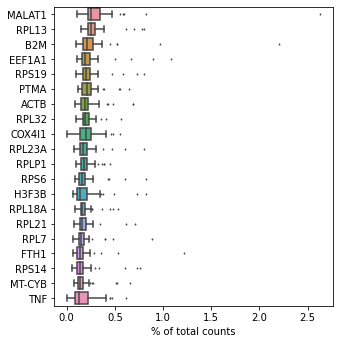

In [9]:
sc.pl.highest_expr_genes(tcells, n_top=20)

In [11]:
sc.pp.filter_cells(tcells, min_genes=100)
sc.pp.filter_genes(tcells, min_cells=2)

In [12]:
tcells.var['mt'] = tcells.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(tcells, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'feature_types' as categorical


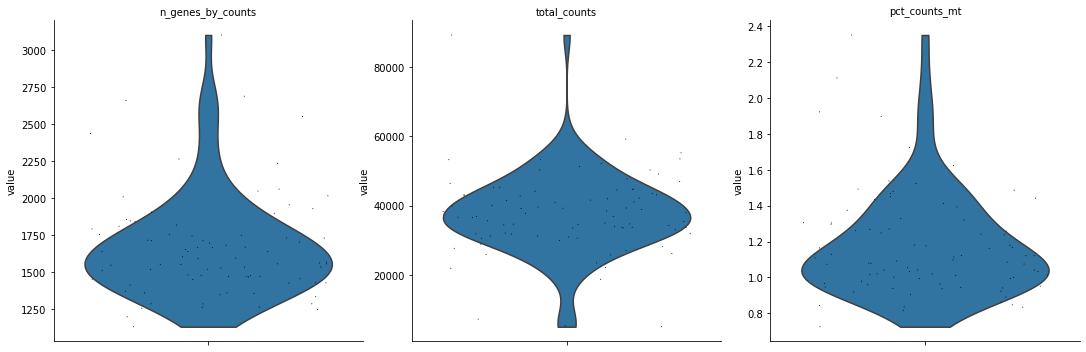

In [13]:
sc.pl.violin(tcells, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

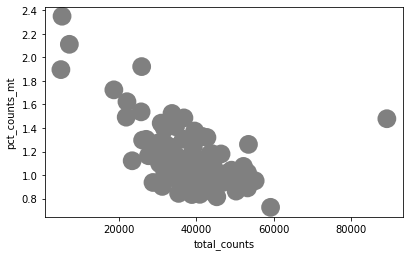

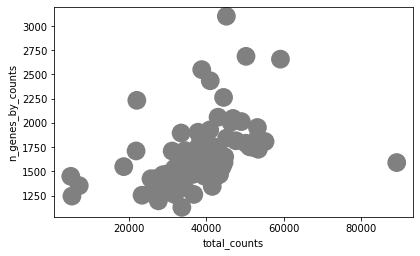

In [14]:
sc.pl.scatter(tcells, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(tcells, x='total_counts', y='n_genes_by_counts')

In [15]:
tcells = tcells[tcells.obs.n_genes_by_counts < 2500, :]
tcells = tcells[tcells.obs.pct_counts_mt < 5, :]

In [16]:
sc.pp.normalize_total(tcells, target_sum=1e4)

/home/cmr736/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
sc.pp.log1p(tcells)

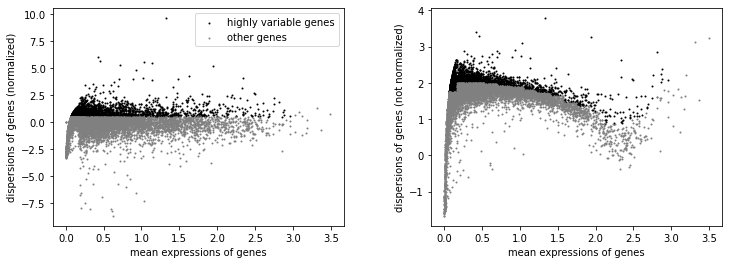

In [18]:
sc.pp.highly_variable_genes(tcells, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(tcells)

In [19]:
tcells.raw = tcells

In [20]:
tcells = tcells[:, tcells.var.highly_variable]

In [21]:
sc.pp.regress_out(tcells, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(tcells, max_value=10)


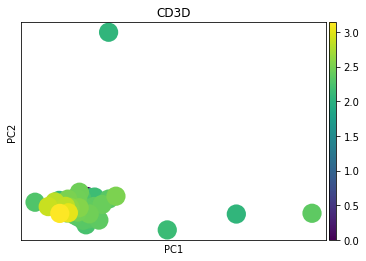

In [24]:
sc.tl.pca(tcells, svd_solver='arpack')
sc.pl.pca(tcells, color='CD3D')

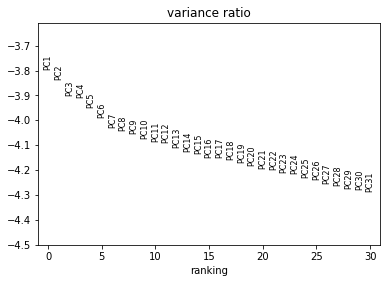

In [25]:
sc.pl.pca_variance_ratio(tcells, log=True)

In [26]:
sc.pp.neighbors(tcells, n_neighbors=10, n_pcs=40)

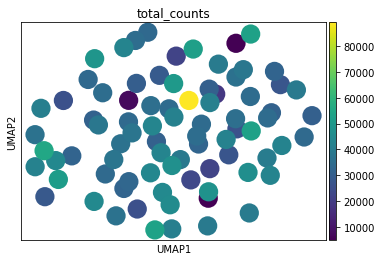

In [32]:
sc.tl.umap(tcells)
sc.pl.umap(tcells, color=[ 'total_counts'])

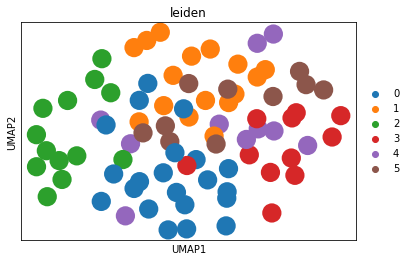

In [31]:
sc.tl.leiden(tcells)
sc.pl.umap(tcells, color=['leiden'])